# Eigendecomposition
This post explains the basics of the eigendecomposition, with some python code to illustrate a simple example. For more theoretical information I'd recommend the freely available book [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) which provides all the necessary background info.

### Basic Theory
- Eigendecomposition starts with the goal of finding a similar _diagonal_ version of a matrix $A$. We want this diagonalized version of $A$ because diagonal matrices are convenient and efficient to work with!
- So a diagonal matrix $D$ that is similar to $A$ should satisfy $D=P^{-1}AP$, in accordance with the definition of [matrix similarity](https://en.wikipedia.org/wiki/Matrix_similarity).
- In other words, we want to find $D$ and $P$ such that $PD=AP$, where $D$ is a diagonal matrix with some scalars $\lambda_1, ... \lambda_n$ on the diagonal. Then we have $PD = [p_1 \lambda_1 | ... | p_n \lambda_n]$, where $p_i$ are the columns of $P$. Similarly, we have $AP = [A p_1 | ... |A p_n]$.
- Using these new formulations of $PD$ and $AP$, we get that $[A p_1 | ... |A p_n] = [\lambda_1 p_1 | ... | \lambda_n p_n]$.
- Look familiar? This equation implies a set of equalities $A p_i = \lambda_i p_i$ -- the eigenvectors and eigenvalues of $A$!
- Indeed, this shows that in order to make such a diagonalization of $A$ we end up using $A$'s eigenvectors and eigenvalues.
- Let's jump into numpy and visualise this.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([
    [2, 1],
    [1, 3]
])

eigvals, eigvecs = np.linalg.eig(A)
# Let's reorder these so that the eigenvalues are in decreasing order
eigvecs[:, [1,0]] = eigvecs[:, [0,1]]
eigvals[[1,0]] = eigvals[[0, 1]]

In [4]:
def plot_vec(ax, vec, colour='blue'):
    # Plot the vector as an arrow
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, fc=colour, ec=colour)

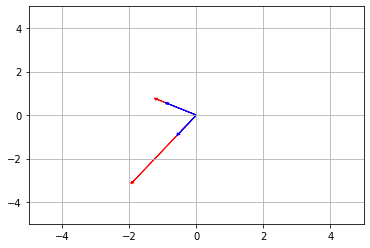

In [5]:
# Create a figure and axis
fig, ax = plt.subplots()

plot_vec(ax, eigvals[0]*eigvecs[:,0], colour='red')
plot_vec(ax, eigvals[1]*eigvecs[:,1], colour='red')
plot_vec(ax, eigvecs[:,0], colour='blue')
plot_vec(ax, eigvecs[:,1], colour='blue')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
# Show the plot
plt.grid(True)
plt.show()

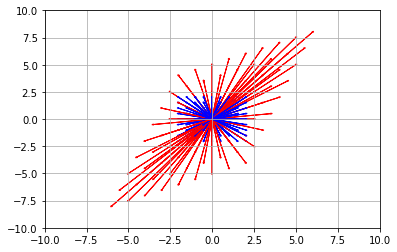

In [6]:
# Let's visualise the affect that multiplying by A has on a grid of vectors

fig, ax = plt.subplots()

for i in np.linspace(-2, 2, 9):
    for j in np.linspace(-2, 2, 9):
        x = np.array([i,j])
        Ax = A @ x
        plot_vec(ax, Ax, colour='red')
        plot_vec(ax, x, colour='blue')
        
# Set axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
# Show the plot
plt.grid(True)
plt.show()

In [7]:
# Now let's create our eigendecomposition using the theory from above
P = eigvecs
P_inv = np.linalg.inv(eigvecs) # In this case P = P_inv because P is symmetric with orthogonal columns!
D = np.eye(2) * eigvals

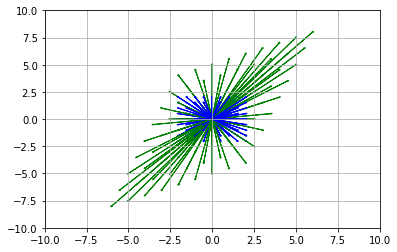

In [8]:
fig, ax = plt.subplots()

for i in np.linspace(-2, 2, 9):
    for j in np.linspace(-2, 2, 9):
        x = np.array([i,j])
        PDPx = P_inv @ D @ P @ x
        plot_vec(ax, PDPx, colour='green')
        plot_vec(ax, x, colour='blue')
        
# Set axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
# Show the plot
plt.grid(True)
plt.show()

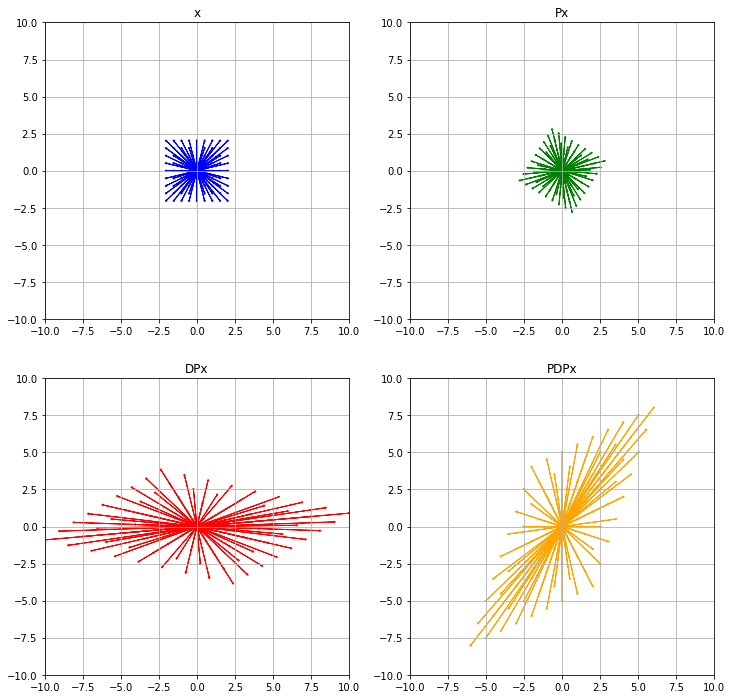

In [11]:
# Let's break this transformation down into its composing parts

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i in np.linspace(-2, 2, 9):
    for j in np.linspace(-2, 2, 9):
        x = np.array([i,j])
        plot_vec(axes[0,0], x, colour='blue')
        plot_vec(axes[0,1], P @ x, colour='green')
        plot_vec(axes[1,0], D @ P @ x, colour='red')
        plot_vec(axes[1,1], P_inv @ D @ P @ x, colour='orange')

for i in [0,1]:
    for j in [0,1]:
        axes[i,j].set_xlim(-10, 10)
        axes[i,j].set_ylim(-10, 10)
        axes[i,j].grid(True)
        
axes[0,0].set_title('x')
axes[0,1].set_title('Px')
axes[1,0].set_title('DPx')
axes[1,1].set_title('PDPx')
        
# Show the plot
plt.show()

### Interpreting these plots
These plots reveal to us why the eigendecomposition works:
- First, the the base of the input is changed so that it uses the eigenvectors as basis vectors. In this basis, multiplying by $\lambda$ will give the same result as multiplying by $A$, because we know each vector position in terms of the eigenvalue positions!
- Next, we multiply by $D$, resulting in the same vectors we would have gotten if we had multiplied by $A$.
- Finally, all that remains is to change the basis back to the original basis, which we achieve by inverting the original basis change via $P^{-1}$.

The fundamental idea is to bring the vector $x$ into a new basis where we know that multiplying by $A$ is the same as multiplying by $D$, and then bring the result back into the original basis, producing the same result as $Ax$.